In [ ]:
# 과일 데이터 불러오기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-15 06:22:19--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-15 06:22:19--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-15 06:22:19--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
fruits = np.load('fruits_300.npy')

In [ ]:
# (100, 100, 100) -> (100, 10000)

apple = fruits[:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:].reshape(-1,100*100)

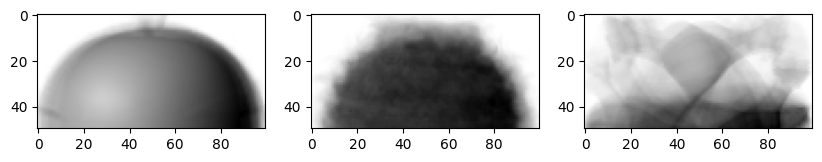

In [ ]:
# 세 과일이 정확하게 분리될 특징이 필요하다 판단하여
# 기존 평균의 그림에서 절반만 사용하기로 하였음

apple_mean = np.mean(apple, axis=0).reshape(100, -1)[:50]
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, -1)[:50]
banana_mean = np.mean(banana, axis=0).reshape(100, -1)[:50]

fig, axs = plt.subplots(1, 3, figsize = (10, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

In [ ]:
# 평균과 fruits의 사진의 크기가 같아야 평균의 차이를 구하기 때문에 크기를 통일

fruits2 = np.array([fruits[i][:50] for i in range(300)])

In [ ]:
# 두 배열의 크기가 같은 것을 확인할 수 있음
print(fruits2[0].shape)
print(apple_mean.shape)

(50, 100)
(50, 100)


In [ ]:
# 기존의 fruits를 사용하면 밑의 코드를 실행시켰을 때 사진의 절반만 나오기 때문에
# 다시 한 번 데이터를 가져옴

fruits = np.load('fruits_300.npy')

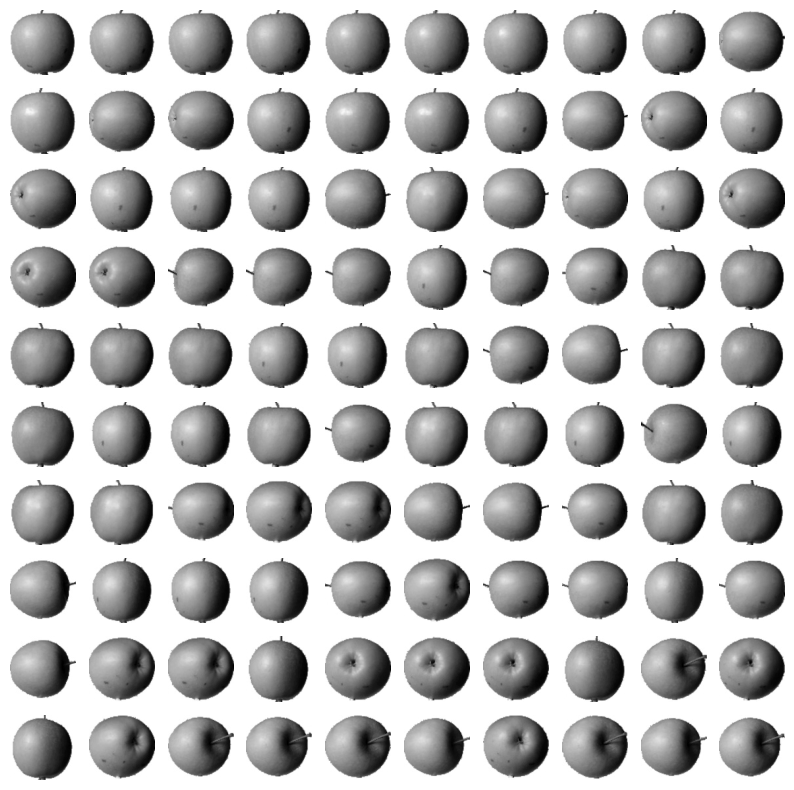

In [ ]:
abs_diff = np.abs(fruits2 - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()
print()

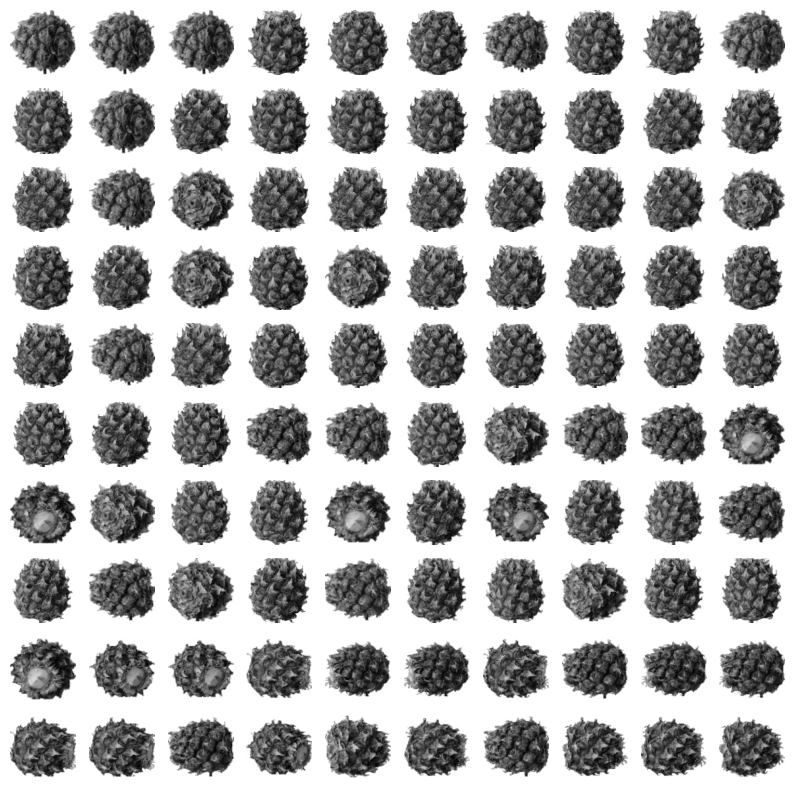

In [ ]:
abs_diff = np.abs(fruits2 - pineapple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

pineapple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[pineapple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

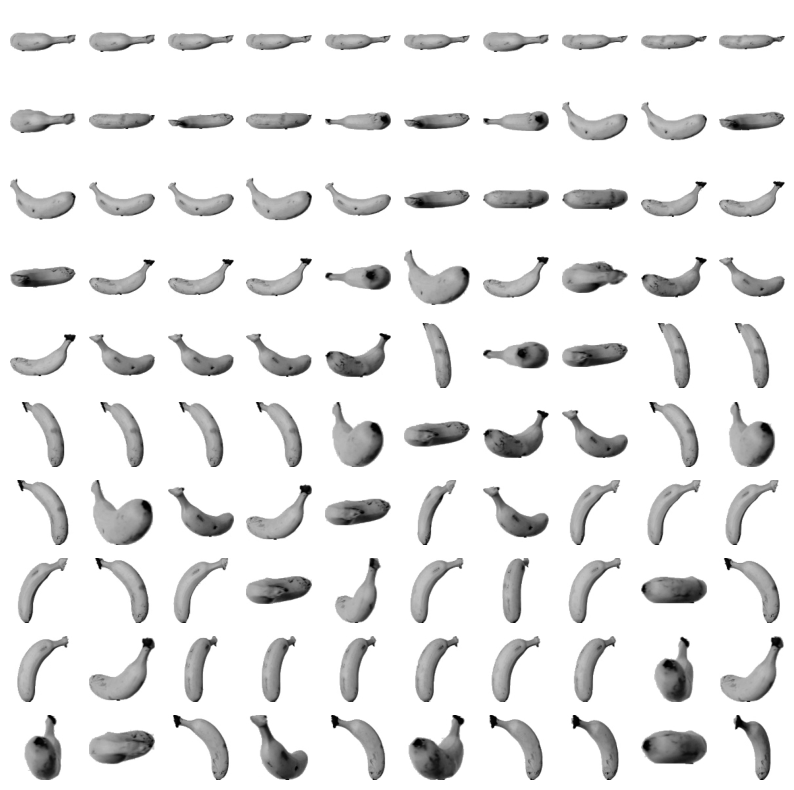

In [ ]:
abs_diff = np.abs(fruits2 - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()